In [1]:
import pandas as pd
import os
import numpy as np

# Import the data using the file path
data_path = ['C:\IntelPython3\projects']
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep=',')
data.shape

(1379, 80)

In [ ]:
dataframe=data.select_dtypes(include=[object])
print(dataframe.shape)
newdf=data.copy()
newdf=newdf.drop(columns=dataframe.columns)
dataframe=pd.get_dummies(dataframe)
#newdf.append(dataframe)
stackdata = pd.concat([newdf,dataframe], axis=1)
stackdata.shape

In [4]:
from sklearn.neighbors import KNeighborsClassifier


In [215]:
newdf.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

In [264]:
#for i in newdf.columns :
 #   if i!='SalePrice':
  #      print(newdf[i])
stackdata.shape
data.tail()


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
1374,953.0,694.0,0.0,None,3,1Fam,None,None,0.0,0.0,...,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,None,3,1Fam,TA,No,790.0,163.0,...,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,None,4,1Fam,Gd,No,275.0,0.0,...,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,None,2,1Fam,TA,Mn,49.0,1029.0,...,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0
1378,1256.0,0.0,0.0,None,3,1Fam,TA,No,830.0,290.0,...,0.0,Pave,6,1256.0,AllPub,736.0,1965,1965,2008,147500.0


## Linear regression
* questions


In [236]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=[i for i in newdf.columns if i!='SalePrice']
X_data=data[X]
Y_data=data['SalePrice']
#knn=StdSc.fit(X_data)
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data, test_size=0.3,random_state=42)


In [293]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,Y_train)
knn.predict(X_test)
X_test.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
942,1077.0,0.0,0.0,3,0.0,0.0,0,0,1007.0,48.0,...,4,3,0.0,0.0,6,1007.0,0.0,1922,1950,2006
59,581.0,530.0,0.0,3,0.0,0.0,0,0,530.0,144.0,...,7,5,0.0,0.0,6,530.0,0.0,1920,1996,2007
405,1412.0,0.0,0.0,3,1005.0,0.0,1,0,387.0,169.0,...,5,6,0.0,0.0,6,1392.0,0.0,1988,1988,2009
458,1073.0,0.0,0.0,3,836.0,0.0,1,0,237.0,0.0,...,7,5,0.0,0.0,6,1073.0,0.0,1965,1965,2007
1300,984.0,620.0,0.0,3,408.0,420.0,0,0,156.0,0.0,...,5,5,0.0,0.0,6,984.0,0.0,1941,1960,2009


In [1]:
a=knn.predict(X_test)
a

NameError: name 'knn' is not defined

In [2]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR_model= LR.fit(X_train, Y_train)
y_predict= LR_model.predict(X_test)
y_predict


NameError: name 'X_train' is not defined

array([1, 1, 1, ..., 0, 0, 0])

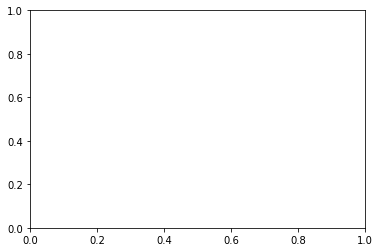

In [31]:
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes()

x_axis, y_axis = np.arange(0, 1,0.005), np.arange(0, 1,0.005)
x,y=np.meshgrid(x_axis,y_axis)
X=pd.DataFrame([x.ravel(),y.ravel()]).T
ls=LinearSVC()
ls=ls.fit([[1,2],[0,1]],[0,1])
y_grid_predictions = ls.predict(X)
y_grid_predictions

In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
import numpy as np
data.shape

(25, 2)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Y_data=data['Scores']
X_data=data['Hours']


In [5]:
X_train.shape

(17,)

In [6]:
np.mean(X_train),np.median(X_train),np.mean(Y_train),np.median(Y_train),np.std(X_train),np.std(Y_train)

(5.18235294117647,
 4.8,
 53.11764705882353,
 54.0,
 2.617415720114616,
 26.0268692676517)

In [7]:
np.std(X_train)

2.617415720114616

In [8]:
cor=data.corr()
cor=cor.abs()

In [9]:
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

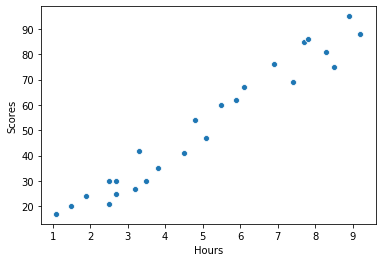

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
a=plt.axes()
sns.scatterplot(X_data,Y_data)

In [21]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [25]:
data['Scores'].skew()

0.2339646665397317

In [26]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


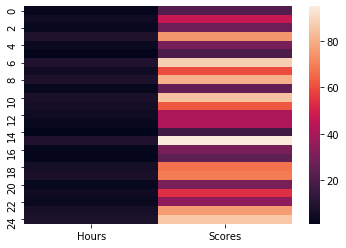

In [31]:
sns.heatmap(data)

In [107]:
X=data['Hours'].values
y=data['Scores'].values
traindata,testdata=train_test_split(data,test_size=0.3,random_state=0)
traindata,testdata

(    Hours  Scores
 23    6.9      76
 14    1.1      17
 1     5.1      47
 10    7.7      85
 13    3.3      42
 8     8.3      81
 6     9.2      88
 18    6.1      67
 4     3.5      30
 9     2.7      25
 7     5.5      60
 20    2.7      30
 3     8.5      75
 0     2.5      21
 21    4.8      54
 15    8.9      95
 12    4.5      41,
     Hours  Scores
 5     1.5      20
 2     3.2      27
 19    7.4      69
 16    2.5      30
 11    5.9      62
 22    3.8      35
 17    1.9      24
 24    7.8      86)

In [79]:
lr=LinearRegression()
lr=lr.fit(X_train.reshape(-1,1),Y_train)
pred=lr.predict(X_test.reshape(-1,1))

In [50]:
lr.score(X_test.reshape(-1,1),Y_test)

0.9568211104435257

In [52]:
np.sqrt(mean_squared_error(Y_test,pred))

4.792191274636315

In [59]:
lr.intercept_

2.370815382341881

In [55]:
import statsmodels.api as sm

model = sm.OLS(X_train,Y_train).fit()
predictions = model.predict(X_test)

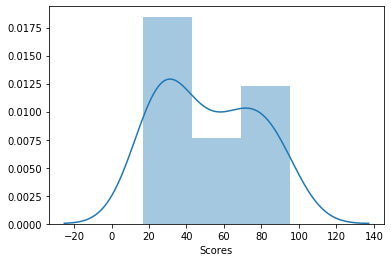

In [60]:
sns.distplot(data['Scores'])

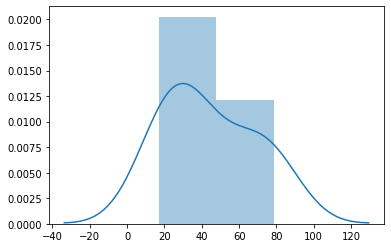

In [61]:
sns.distplot(pred)

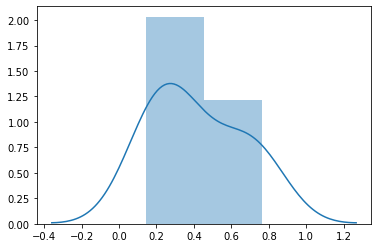

In [62]:
sns.distplot(predictions)

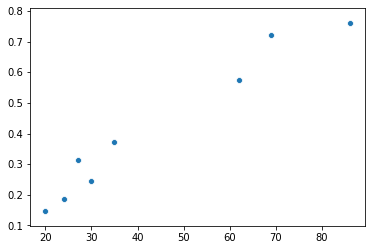

In [66]:
sns.scatterplot(Y_test,predictions)

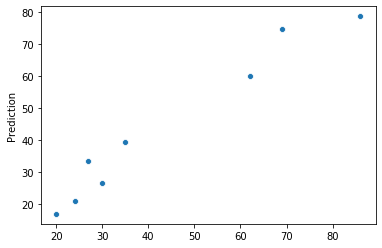

In [85]:
prec=pd.Series(pred,name='Prediction')
sns.scatterplot(Y_test,prec)

In [86]:
predictions,pred

(array([0.14641088, 0.31234321, 0.72229367, 0.24401813, 0.57588279,
        0.37090756, 0.18545378, 0.76133657]),
 array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
        39.56736879, 20.96909209, 78.72163554]))

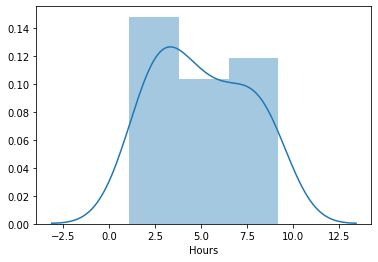

In [88]:
sns.distplot(data['Hours'])

In [125]:
from sklearn.preprocessing import StandardScaler  

sd=StandardScaler()
trainsd=sd.fit_transform(traindata)
testsd=sd.transform(testdata)

In [133]:
h,s=pd.DataFrame(trainsd[:,0],columns=['Hours']),pd.DataFrame(trainsd[:,1],columns=['Scores'])
dt=pd.concat([h,s],axis=1)
th,ts=pd.DataFrame(testsd[:,0],columns=['Hours']),pd.DataFrame(testsd[:,1],columns=['Scores'])
testdt=pd.concat([th,ts],axis=1)

In [138]:
lr=LinearRegression()
td=dt['Hours'].values.reshape(-1,1)
lr=lr.fit(td,dt['Scores'])
pr=lr.predict(testdt['Hours'].values.reshape(-1,1))

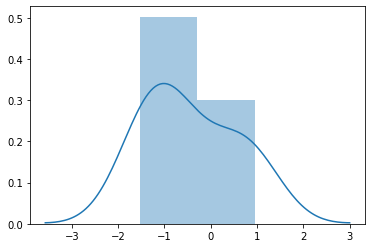

In [139]:
sns.distplot(pr)

In [144]:
dt.skew()

Hours     0.071436
Scores    0.032195
dtype: float64

In [146]:
from scipy.stats import shapiro
shapiro(data['Scores'])[1]<=0.05

True

In [185]:
ly=np.log(dt['Scores'])
ly.fillna(0)
xtrain,xtest,ytrain,ytest=train_test_split(dt['Hours'],ly,test_size=0.3,random_state=0)
lr=LinearRegression()
X=xtrain.values.reshape(-1,1)
ytrain=ytrain.fillna(0)
lr=lr.fit(X,ytrain)
ytest=ytest.fillna(0)
lr.score(xtest.values.reshape(-1,1),ytest)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-12.427246204038118

In [188]:
sq=np.sqrt(dt['Scores'])
sq=sq.fillna(0)
x1,x2,y1,y2=train_test_split(dt['Hours'],sq,test_size=0.3,random_state=0)
lr1=LinearRegression()
lr1=lr1.fit(x1.values.reshape(-1,1),y1)
lr1.score(x2.values.reshape(-1,1),y2)


0.44255806783883

In [218]:
bc=(stats.boxcox(dt['Scores'].abs()))
# bc=bc.abs()
bc=pd.Series(np.asarray(bc[0]))
x3,x4,y3,y4=train_test_split(dt['Hours'].abs(),bc,test_size=0.3,random_state=0)
lr2=LinearRegression()
lr2=lr2.fit(x3.values.reshape(-1,1),y3)
lr2.score(x4.values.reshape(-1,1),y4)

0.5760837864002

### without scaling

In [219]:
ly=np.log(data['Scores'])
ly.fillna(0)
xtrain,xtest,ytrain,ytest=train_test_split(data['Hours'],ly,test_size=0.3,random_state=0)
lr=LinearRegression()
X=xtrain.values.reshape(-1,1)
ytrain=ytrain.fillna(0)
lr=lr.fit(X,ytrain)
ytest=ytest.fillna(0)
lr.score(xtest.values.reshape(-1,1),ytest)


0.9657545996997009

In [220]:
sq=np.sqrt(data['Scores'])
sq=sq.fillna(0)
x1,x2,y1,y2=train_test_split(data['Hours'],sq,test_size=0.3,random_state=0)
lr1=LinearRegression()
lr1=lr1.fit(x1.values.reshape(-1,1),y1)
lr1.score(x2.values.reshape(-1,1),y2)


0.9684653555605006

In [255]:
bc=(stats.boxcox(data['Scores'].abs()))
# bc=bc.abs()
bc=pd.Series(np.asarray(bc[0]))
x3,x4,y3,y4=train_test_split(data['Hours'],bc,test_size=0.3,random_state=0)
lr2=LinearRegression()
lr2=lr2.fit(x3.values.reshape(-1,1),y3)
lr2.score(x4.values.reshape(-1,1),y4)

0.9691413689674743

In [222]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [223]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data['Hours'], data['Scores'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.976


In [224]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1764.
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                    8.38e-18
Time:                        15:17:40   Log-Likelihood:                         -14.273
No. Observations:                  17   AIC:                                      30.55
Df Residuals:                      16   BIC:                                      31.38
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0976      0.002     42.006      0.000       0.093       0.103
==============================================================================
Omnibus:                        1.998   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.192
Skew:                           0.341   Prob(JB):                        0.551
Kurtosis:                       1.897   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
np.sqrt(mean_squared_error(testdata['Scores'],prec))

4.792191274636315

In [238]:
model.rsquared

0.991013670661999

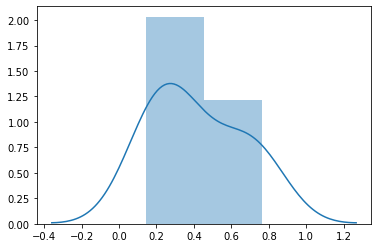

In [242]:
sns.distplot(predictions)

TypeError: set() got an unexpected keyword argument 'xlabel'

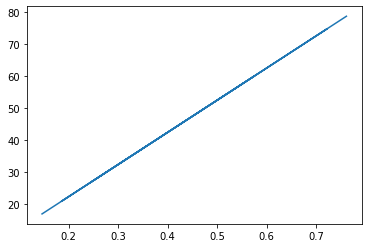

In [279]:
a=plt.axes()
a.plot(predictions,prec)
sns.set(xlabel='OLS')
sns.ylabel('sklearn')

In [3]:
data=pd.read_csv('C:\IntelPython3\projects\Iris_data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


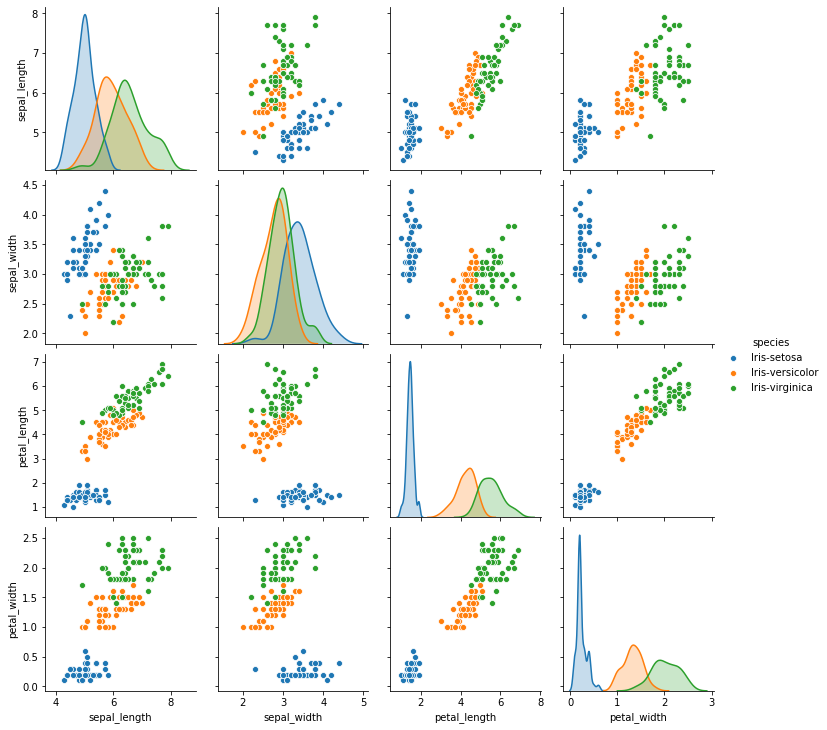

In [52]:
data['species'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sepal=data.columns[0:2]

sns.pairplot(data,hue='species')


In [68]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
yenc=lenc.fit_transform(data['species'])
y=pd.Series(yenc,name='species')


In [69]:
from sklearn.model_selection import train_test_split
Xcols=[i for i in data.columns if i!='species']
X=data[Xcols]



In [70]:
from sklearn.model_selection import StratifiedShuffleSplit
ss=StratifiedShuffleSplit(random_state=0)
for trainidx,testidx in ss.split(X,y):
    xtrain,xtest=X.loc[trainidx],X.loc[testidx]
    ytrain,ytest=y.loc[trainidx],y.loc[testidx]
xtrain.shape,ytrain.shape

((135, 4), (135,))

In [78]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC=DTC.fit(xtrain,ytrain)

In [79]:
DTC.get_n_leaves()

9

In [80]:
ypred=DTC.predict(xtest)

In [81]:
ypred

array([1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0])

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

def error(ytrue,ypred):
    ErrorDF=pd.Series({
    'accuracy': accuracy_score(ytrue,ypred),
    'precision':precision_score(ytrue,ypred,average='micro'),
    'recall':recall_score(ytrue,ypred,average='micro'),
    'f1'  :f1_score(ytrue,ypred,average='micro'),
    })
    return ErrorDF
    

In [114]:
error(ytest,ypred)

accuracy     1.0
precision    1.0
recall       1.0
f1           1.0
dtype: float64

In [123]:
unseendata=pd.DataFrame({'sepal_length':[5.0,5.1],'sepal_width':[2.0,3.8],'petal_length':[3.5,1.9],'petal_width':[1.0,0.4]},columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [124]:
pred=DTC.predict(unseendata)

In [125]:
from sklearn.model_selection import cross_val_score
cross_val_score(DTC,xtrain,ytrain, cv=10)[1]

1.0

In [127]:
ytest[60],ytest[44]

(1, 0)

In [128]:
pred

array([1, 0])

In [129]:
storedata=pd.read_csv('C:\IntelPython3\projects\SampleSuperstore.csv')
storedata.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [130]:
# Missing values
storedata.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool